# **Carga de data y librerias**



In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import seaborn as sns
import seaborn.objects as so

# **Limpieza del DataSet**

In [51]:
link='DataFootball_1.csv'
df=pd.read_csv(link,  sep=';' )
df

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,Victor Osimhen,18,186.0,Niger,Forward,1000000,12,287,0,0,...,16,34,6,15,13,36,48,33,No,No
6820,Renato Steffen,25,170.0,Switzerland,Forward,3500000,16,659,0,0,...,16,34,6,15,13,36,48,33,No,No
6821,Paul Jaeckel,19,189.0,Germany,Defender,5000,3,270,0,0,...,16,34,6,15,13,36,48,33,No,No
6822,Paul Verhaegh,33,178.0,Netherlands,Defender,1000000,31,2614,2,2,...,16,34,6,15,13,36,48,33,No,No


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6824 entries, 0 to 6823
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player                   6824 non-null   object 
 1   age                      6824 non-null   int64  
 2   height                   6823 non-null   float64
 3   nationality              6824 non-null   object 
 4   position                 6824 non-null   object 
 5   value                    6824 non-null   int64  
 6   games                    6824 non-null   int64  
 7   minutes                  6824 non-null   int64  
 8   goals                    6824 non-null   int64  
 9   assists                  6824 non-null   int64  
 10  crosses                  6824 non-null   int64  
 11  tackles                  6824 non-null   int64  
 12  pressures                6824 non-null   int64  
 13  blocks                   6824 non-null   int64  
 14  touches                 

In [53]:
df['age'].replace(0,np.nan,inplace=True)
df['height'].replace(0,np.nan,inplace=True)

In [54]:
def missing_data_columns(dataFrame):
  dataNan=dataFrame.isnull().sum(axis=0)
  return dataNan

In [55]:
missing_data_columns(df)

player                       0
age                          3
height                      11
nationality                  0
position                     0
value                        0
games                        0
minutes                      0
goals                        0
assists                      0
crosses                      0
tackles                      0
pressures                    0
blocks                       0
touches                      0
fouls                        0
fouled                       0
offsides                     0
own goals                    0
ball recoveries              0
saves                        0
squad                        0
Season                       0
league                       0
Attendance                   0
games starts                 0
passes completed             0
sca                          0
gca                          0
dribbles completed           0
pens won                     0
goals against gk             0
shots on

In [56]:
def calc_mode (feature,dataFrame):
  mode=dataFrame[feature].mode()
  return mode

In [57]:
def calc_media(feature,dataFrame):
  media=dataFrame[feature].mean()
  return media

In [58]:
def percent_lost_data(dataFrame,feature):
  cant_nan=missing_data_columns(dataFrame)
  per=(cant_nan.loc[feature]/dataFrame.shape[0])*100
  return round(per,2)

In [59]:
mediaEdad=round(calc_media('age',df),0)
df['age'].replace(np.nan,mediaEdad,inplace=True)

In [60]:
mediaHeight=round(calc_media('height',df),0)
df['height'].replace(np.nan,mediaHeight,inplace=True)

In [61]:
modaCLBestScorer=calc_mode('CLBestScorer',df)
print(modaCLBestScorer)
df['CLBestScorer'].replace(np.nan,'No',inplace=True)

0    No
Name: CLBestScorer, dtype: object


In [62]:
df

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30.0,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37.0,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26.0,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19.0,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22.0,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,Victor Osimhen,18.0,186.0,Niger,Forward,1000000,12,287,0,0,...,16,34,6,15,13,36,48,33,No,No
6820,Renato Steffen,25.0,170.0,Switzerland,Forward,3500000,16,659,0,0,...,16,34,6,15,13,36,48,33,No,No
6821,Paul Jaeckel,19.0,189.0,Germany,Defender,5000,3,270,0,0,...,16,34,6,15,13,36,48,33,No,No
6822,Paul Verhaegh,33.0,178.0,Netherlands,Defender,1000000,31,2614,2,2,...,16,34,6,15,13,36,48,33,No,No


In [63]:
df[df['player']=='Cristiano Ronaldo']

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
2089,Cristiano Ronaldo,34.0,187.0,Portugal,Forward,60000000,33,2917,31,5,...,1,38,26,5,7,76,43,83,Yes,No
3537,Cristiano Ronaldo,33.0,187.0,Portugal,Forward,90000000,31,2688,21,8,...,1,38,28,6,4,70,30,90,Yes,No
6231,Cristiano Ronaldo,32.0,187.0,Portugal,Forward,100000000,27,2288,26,5,...,3,38,22,10,6,94,44,76,Yes,Yes


In [64]:
df.describe()

,age,height,value,games,minutes,goals,assists,crosses,tackles,pressures,...,cards yellow,shots total,LgRk,MP,W,D,L,GF,GA,Pts
count,6824.000000,6824.000000,6.824000e+03,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,...,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,25.440504,182.230217,1.023350e+07,19.031653,1342.866208,1.828693,1.261284,16.994285,22.942556,213.284437,...,2.787222,17.054367,10.337046,36.583529,13.725381,9.071073,13.787075,50.425557,50.479045,50.236665
std,4.412284,6.496048,1.660910e+07,11.175267,972.311088,3.458147,2.021036,24.585900,22.318046,189.785532,...,2.820151,21.584069,5.721757,2.868877,6.015922,3.091087,5.721998,17.686226,13.249049,17.365470
min,14.000000,162.000000,5.000000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,27.000000,2.000000,2.000000,1.000000,22.000000,21.000000,13.000000
25%,22.000000,178.000000,1.500000e+06,9.000000,455.000000,0.000000,0.000000,1.000000,4.000000,49.000000,...,0.000000,2.000000,5.000000,38.000000,9.000000,7.000000,10.000000,37.000000,42.000000,39.000000
50%,25.000000,183.000000,4.000000e+06,20.000000,1236.000000,0.000000,0.000000,6.000000,17.000000,175.000000,...,2.000000,10.000000,10.000000,38.000000,13.000000,9.000000,14.000000,47.000000,50.000000,48.000000
75%,28.000000,187.000000,1.200000e+07,29.000000,2121.000000,2.000000,2.000000,23.000000,36.000000,326.000000,...,4.000000,23.000000,15.000000,38.000000,17.000000,11.000000,17.000000,59.000000,59.000000,60.000000
max,41.000000,203.000000,2.000000e+08,38.000000,3420.000000,36.000000,21.000000,223.000000,160.000000,1056.000000,...,17.000000,196.000000,20.000000,38.000000,32.000000,18.000000,29.000000,108.000000,85.000000,100.000000


In [65]:
missing_data_columns(df)

player                     0
age                        0
height                     0
nationality                0
position                   0
value                      0
games                      0
minutes                    0
goals                      0
assists                    0
crosses                    0
tackles                    0
pressures                  0
blocks                     0
touches                    0
fouls                      0
fouled                     0
offsides                   0
own goals                  0
ball recoveries            0
saves                      0
squad                      0
Season                     0
league                     0
Attendance                 0
games starts               0
passes completed           0
sca                        0
gca                        0
dribbles completed         0
pens won                   0
goals against gk           0
shots on target against    0
CLBestScorer               0
cards yellow  

# **Visualizacion de los investigado**

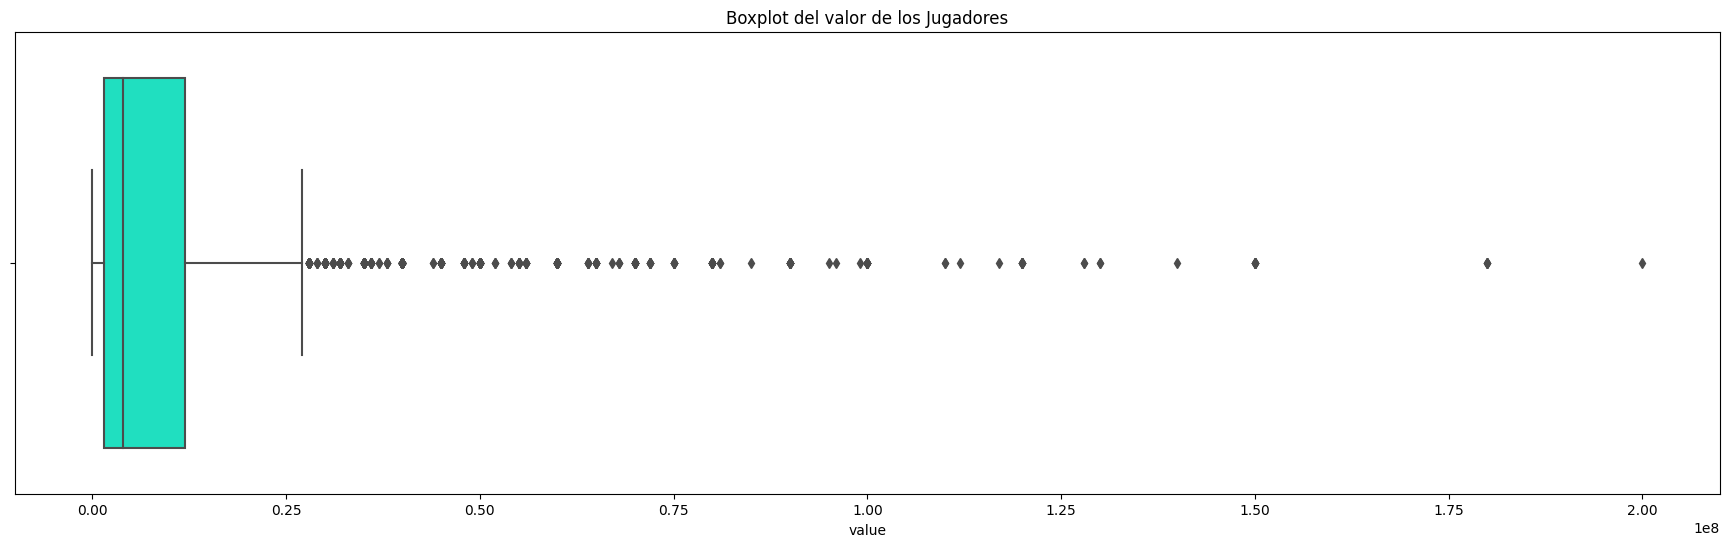

In [66]:
#Podemos ver como el precio de jugadores algunos tiende a tender precios demasiados altos
plt.subplots(figsize = (22, 6))

sns.boxplot(x=df['value'],color='#00FFD5')
plt.title('Boxplot del valor de los Jugadores')
plt.show()

In [67]:
#Quise analizar porque estos jugadores tienen valores tan elevados
#Calculo de los valores atipicos
Q1=df['value'].quantile(0.25)
Q2=df['value'].median()
Q3=df['value'].quantile(0.75)

valMin=df['value'].min()
valMax=df['value'].max()

RangoIQ=Q3-Q1

limiSu=Q3+1.5*RangoIQ

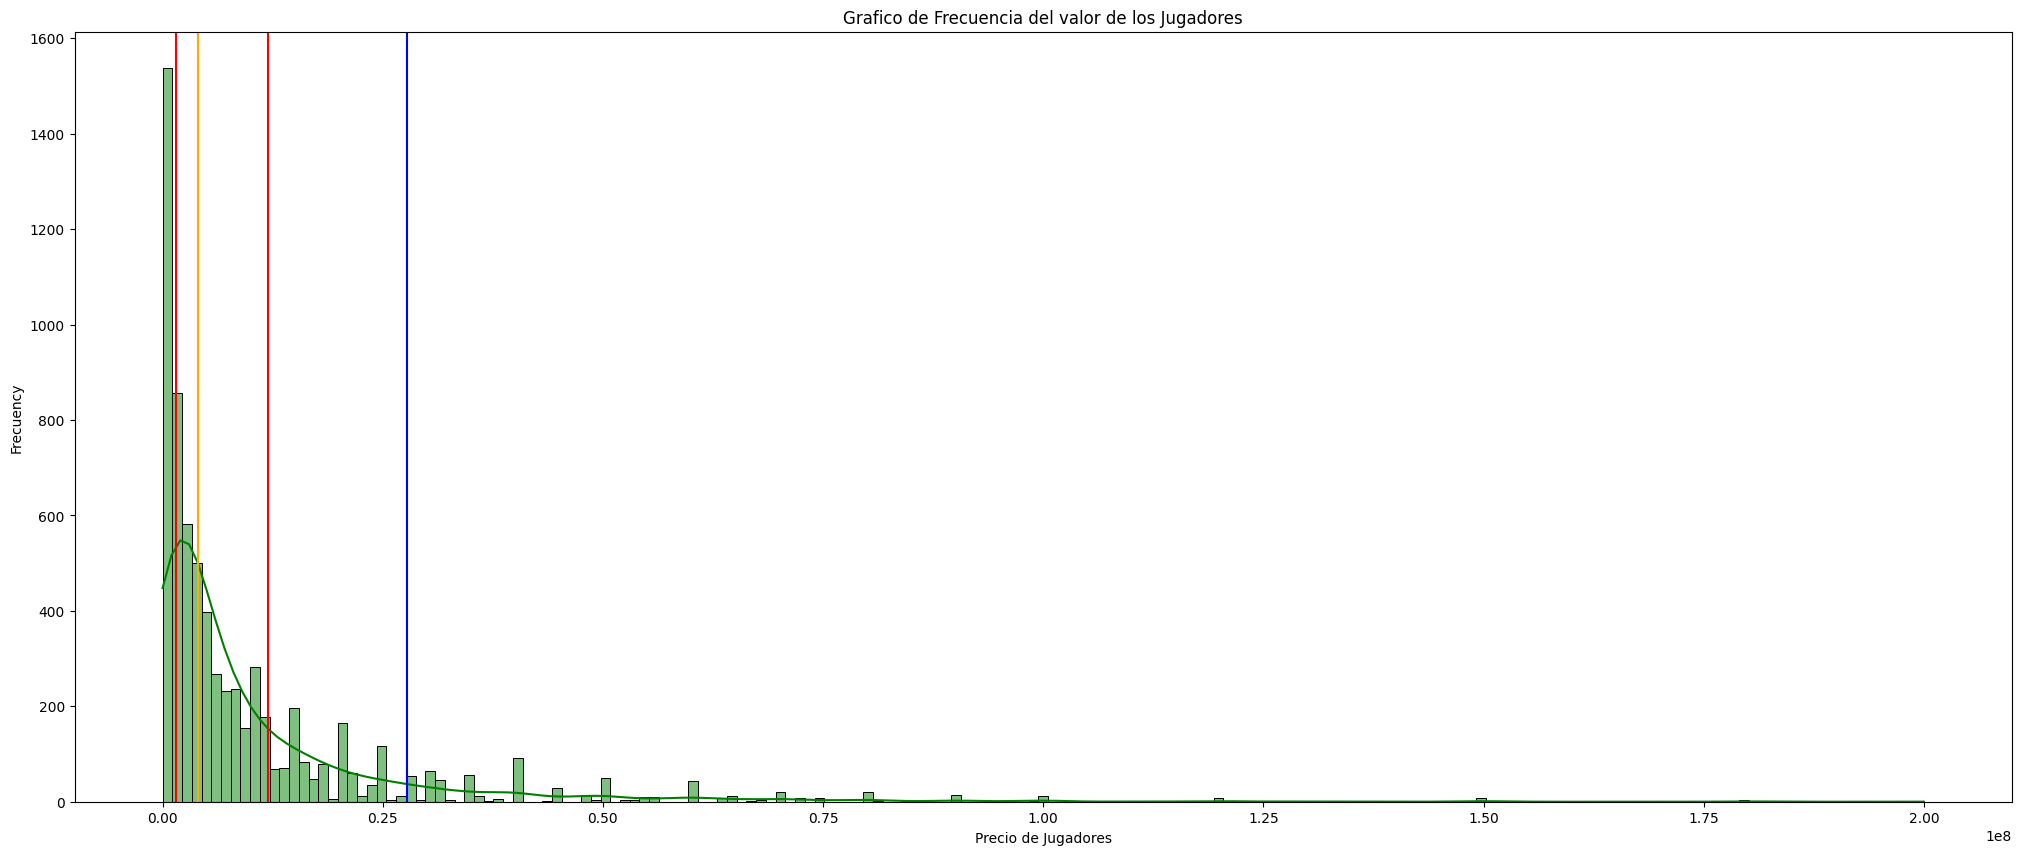

In [68]:
plt.subplots(figsize = (25, 10))
sns.histplot(data=df, x="value", kde=True,color='green')
plt.ylabel('Frecuency')
plt.xlabel('Precio de Jugadores')
plt.title('Grafico de Frecuencia del valor de los Jugadores')

plt.axvline(Q3,color='red')
plt.axvline(Q1,color='red')

plt.axvline(df['value'].median(),color='#FFAB00')

plt.axvline(limiSu,color='blue')
plt.show()

Filtrado de los valores atipicos

In [69]:
#Jugadores con Precio regular
df_norma=df[df['value']<limiSu]
df_norma

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30.0,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37.0,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26.0,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19.0,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22.0,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,Victor Osimhen,18.0,186.0,Niger,Forward,1000000,12,287,0,0,...,16,34,6,15,13,36,48,33,No,No
6820,Renato Steffen,25.0,170.0,Switzerland,Forward,3500000,16,659,0,0,...,16,34,6,15,13,36,48,33,No,No
6821,Paul Jaeckel,19.0,189.0,Germany,Defender,5000,3,270,0,0,...,16,34,6,15,13,36,48,33,No,No
6822,Paul Verhaegh,33.0,178.0,Netherlands,Defender,1000000,31,2614,2,2,...,16,34,6,15,13,36,48,33,No,No


In [70]:
#Jugadores con Precio fuera del rango
df_outVal=df[(df['value']>limiSu)]
df_outVal

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
22,Youri Tielemans,22.0,176.0,Belgium,Midfield,44000000,37,2828,3,6,...,5,38,18,8,12,67,41,62,No,No
61,Wojciech Szczęsny,29.0,196.0,Poland,Goalkeeper,35000000,29,2591,0,0,...,1,38,26,5,7,76,43,83,Yes,No
63,Wissam Ben Yedder,28.0,170.0,France,Forward,40000000,26,2164,18,4,...,9,28,11,7,10,44,44,40,No,No
77,Wilfred Ndidi,22.0,183.0,Niger,Midfield,36000000,32,2674,2,1,...,5,38,18,8,12,67,41,62,No,No
99,Virgil van Dijk,28.0,193.0,Netherlands,Defender,80000000,38,3420,5,1,...,1,38,32,3,3,85,33,99,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,Danny Rose,27.0,173.0,United Kingdom,Defender,30000000,10,800,0,1,...,3,38,23,8,7,74,36,77,Yes,No
6593,Victor Wanyama,26.0,184.0,Kenya,Midfield,30000000,18,846,1,0,...,3,38,23,8,7,74,36,77,Yes,No
6658,João Cancelo,23.0,182.0,Portugal,Midfield,35000000,1,90,0,0,...,4,38,22,7,9,65,38,73,Yes,No
6662,Gonçalo Guedes,20.0,179.0,Portugal,Midfield,40000000,33,2435,5,7,...,4,38,22,7,9,65,38,73,Yes,No


In [71]:
so.Plot( df_norma.groupby('position')['value'].mean(),df_norma.groupby('position')['value'].mean().index,color=df_norma.groupby('position').mean().index
).add(so.Bar(),orient='y').label(color=str.capitalize,title='Promedio del precios de los jugadores con precios regulares por posicion')

TypeError: Could not convert Zouhair FeddalZeki CelikYuri BerchicheYunis AbdelhamidYoussouf SabalyYoussouf KonéYerry MinaYeray ÁlvarezYan ValeryYıldırım Mert ÇetinXisco CamposXimo NavarroXavi QuintillàXabier EtxeitaWilliam Troost-EkongWilliam SalibaWilliamWilli OrbanWesley MoustacheWesley FofanaWes MorganWendellVukašin JovanovićVlad ChiricheșVitorino HiltonVincent ManceauVincent LauriniVictor PereaVictor MosesVasco ReginiVasco ReginiValentino LazaroValentino LazaroVictor LaguardiaVictor DiazUwe HünemeierUnai NúñezUnai GarcíaUnai BustinzaTyrone MingsTyrick MitchellTyler AdamsTony JantschkeToni LeistnerToni LatoTommaso AugelloToby AlderweireldToĂ±oTin JedvajTimothy Fosu-MensahTimothy ChandlerTimothy CastagneTimothée KolodziejczakTimo BeckerTimm KloseTiago DjalóThomas PledlThomas MeunierThomas FoketThomas DelaineThomas BasilaThierry CorreiaThibaut VargasThiago SilvaThiago CionekTheodor Gebre SelassieThéo Sainte-LuceThéo PellenardTariq LampteyTariq LampteyTakehiro TomiyasuTachiSven BenderStoppila SunzuSteven ZuberSteven MoreiraSteve CookStephan LichtsteinerStefano SabelliStefano DenswilStefan SavićStefan PoschStefan MitrovićStefan LainerStefan IlsankerStefan IlsankerStanley N'SokiSolly MarchSokratis PapastathopoulosSofiane AlakouchSimone PinnaSimone IacoponiSimon KjærSimon KjærSimon FrancisSimon FaletteSidneiShkodran MustafiShane DuffySergio ReguilónSergio RamosSergio PostigoSergio EscuderoSergi PalenciaSergi GómezSenou CoulibalySenad LulićSebastien De MaioSebastiano LupertoSebastian WalukiewiczSebastian SchonlauSebastian PrödlSebastian LangkampSebastiaan BornauwSead KolašinacScott DannSantiago AriasSamuel MoutoussamySamir SantosSam ByramSalvatore BocchettiSalif SanéSacha BoeySébastien CorchiaSéamus ColemanRyan FredericksRyan BertrandRyan BennettRyan BennettRuben GabrielsenRuben AguilarRubén PeñaRubén DuarteRonald AraújoRonaël Pierre-GabrielRomario BenzarRomain ThomasRomain SaïssRomain PerraudRoger IbanezRogérioRodrigo TarínRodrigo ElyRodrigo BecaoRobin Le NormandRobin KochRobin KnocheRobin GosensRobin BormuthRoberto RosalesRobert SkovRober CorreaRob HoldingRiza DurmisiRidle BakuRiccardo GaglioloRicardo RodríguezRene KrhinReinildo MandavaReece JamesRayan PhilippeRayan Aït NouriRúben VinagreRúben VezoRaphael FrambergerRaoul BellanovaRaoul BellanovaRamy BensebainiRamiro Funes MoriRagnar KlavanRafael TolóiRafael CzichosRafaelRafa SoaresRacine ColyRaúl NavasRaúl GarcíaRaúl AlbiolQuiniPol LirolaPipaPhillipp MwenePhilipp MaxPhilipp LienhartPhil JonesPhil JagielkaPeter PekarikPeter AnkersenPervis EstupiñánPercy PradoPedrosaPedro PorroPedro MendesPedro BigasPaweł DawidowiczPavel KaderábekPaulo OtávioPaulo OliveiraPaul DummettPau TorresPatrick van AanholtPatrick BurnerPatricPaolo GhiglionePaolo FaragòPanagiotis RetsosPablo ZabaletaPablo PiattiPablo MartínezPablo MarìPablo de BlasisPabloOumar SoletOscar WendtOmar ColleyOleksandr ZinchenkoOla AinaOhis Felix UduokhaiObite N'DickaNordi MukieleNoah KatterbachNikola MilenkovicNikola MaksimovicNiko GießelmannNiklas StarkNiklas MoisanderNicolas PalloisNicolas NkoulouNicolas Isimat-MirinNicolas CozzaNicolò ArminiNicolás OtamendiNicola MurruNico SchulzNico SchlotterbeckNicholas OpokuNicholas OpokuNianzou KouassiNeven SuboticNenad TomovicNeil TaylorNehuén PazNehuén PazNeco WilliamsNayef AguerdNaldoNacho VidalNacho MonrealNacho MonrealNachoNachoNéstor AraujoMuzinga NgondaMoussa WaguéMoussa WaguéMoussa NiakhateMoussa DiarraMouctar DiakhabyMolla WaguĂ©Mohammed SalisuMohamed SimakanMohamed FaresMohamed DrĂ¤gerMitchell WeiserMitchell DijksMitchel BakkerMilos VeljkovicMikel BalenziagaMihailo RistiÄ‡Miguel TraucoMichel Ndary AdopoMichael ParensenMichael LangMichael KeaneMexerMert MuldurMerih DemiralMelvin BardMelayro BogardeMaya YoshidaMaya YoshidaMaximiliano OliveraMaximilian MittelstĂ¤dtMaxime PoundjĂ©Max KilmanMax AaronsMattia De SciglioMattia CaldaraMattia BaniMatthieu UdolMatthias ZimmermannMatthias BaderMatthew LowtonMatteo LovatoMatteo GabbiaMatteo DarmianMatt TargettMatt DohertyMats HummelsMatija NastasicMathieu GoncalvesMathieu DebuchyMathias JĂ¸rgensenMathew LeckieMathĂ­as SuĂˇrezMathĂ­as OliveraMateu MoreyMateo PavloviÄ‡Mateo MusacchioMassimiliano MangravitiMason HolgateMarvin ZeegelaarMarvin PlattenhardtMarvin FriedrichMartin ValjentMartin KellyMartin HintereggerMartin AguirregabiriaMartĂ­n MontoyaMartín CáceresMarlonMarkus SuttnerMarko PjacaMario HermosoMario GasparMarin PongraÄŤiÄ‡Marek SuchĂ˝Marcos RojoMarcos AlonsoMarco FriedlMarco CalderoniMarcelo SaracchiMarceloMarceloMarcel TisserandMarcel SchmelzerMarcel HalstenbergMarc NavarroMarc BartraMarash KumbullaManuel SĂˇnchezManuel LazzariManuel GuldeManuel CabitManuel AkanjiMamadou SakhoMamadou FofanaMalick ThiawMalang SarrMakoto HasebeMads PedersenMario RuiLyancoLumor AgbenyenuLuke ThomasLuke ShawLukasz PiszczekLukas KlunterLukas KüblerLuiz FelipeLuigi VitaleLudwig AugustinssonLudovic BaalLucas PerrinLucas OlazaLuca RossettiniLuca RanieriLuca PellegriniLuca KilianLuca FalboLuca CeppitelliLouis BeyerLoris BenitoLorenzo VenutiLorenzo TonelliLorenzo PirolaLorenzo De SilvestriLoĂŻck LandreLoĂŻc PerrinLoĂŻc Mbe SohLluis LópezLloyd KellyLisandro MagallĂˇnLionel CaroleLilloLewis DunkLeonardo SpinazzolaLeonardo KoutrisLeonardo BonucciLeonardo BalerdiLeon DajakuLeo DuboisLeighton BainesLeandro CabreraLeandro CabreraLayvin KurzawaLaurent KoscielnyLaurent JansLasse SobiechLars BenderLadislav KrejciLéo DuarteĹ ime VrsaljkoKyle Walker-PetersKyle Walker-PetersKwadwo AsamoahKostas StafylidisKortney HauseKoray GünterKingsley EhizibueKiko OlivasKiko FemeníaKevin VogtKevin VogtKevin VĂˇzquezKevin MbabuKevin LongKevin DansoKevin BonifaziKevin BonifaziKevin AkpogumaKeven SchlotterbeckKenny TeteKenny LalaKenneth OmeruoKen SemaKen ReichelKelvin AmianKastriot DermakuKasim NuhuKarim RekikKamil GlikKaan AyhanKévin RodriguesKévin RodriguesKevin MalcuitJunior SambiaJunior FirpoJulien FaussurierJulian RyersonJulian ChabotJules KoundĂ©Juan MirandaJuan JesusJuan FoythJuan CuadradoJuan BernatJosuĂ© HomawooJoseph AidooJoseba ZalduaJosé Luis PalominoJosĂ© HolebasJosĂ© FonteJosĂ© Antonio MartĂ­nez GilJosĂ© ĂngelJoris GnagnonJorge SĂˇenzJorge MiramĂłnJorge MerĂ©Jordon IbeJordan TorunarighaJordan LukakuJordan LefortJordan AmaviJonyJonny EvansJonny CastroJonjoe KennyJonathan SilvaJonathan SchmidJonathan PanzoJon PachecoJohn EganJohn BrooksJohn BoyeJoel WardJoan Sastre VanrellJoachim AndersenJhon ChancellorJetro WillemsJesùs VallejoJesùs VallejoJesùs NavasJerry St. JusteJeremy ToljanJeremy NgakiaJens Stryger LarsenJemersonJeison MurilloJeison MurilloJeffrey GouweleeuwJeffrey BrumaJeffrey BrumaJean-Kevin DuverneJean-Clair TodiboJean-Clair TodiboJean-Charles CastellettoJean ZimmerJawad El YamiqJavier ManquilloJavi SĂˇnchezJavi MoyanoJavi MartĂ­nezJavi LĂłpezJavi LĂłpezJaume CostaJason DenayerJarrad BranthwaiteJaphet TangangaJannik VestergaardJan VertonghenJan BednarekJamilu CollinsJames TomkinsJames TarkowskiJames JustinJamal LewisJamaal LascellesJake VokinsJacopo SalaJack StephensJack StaceyJack SimpsonJack RobinsonJack O'ConnellJaìro RiedewaldJérémy PiedJérémy MorelJérémy GélinJérome RoussillonJérome BoatengIvĂˇn RamisIssiaga SyllaIssa DiopIsaac LihadjiIlario MonterisiIgorIgorIbrahima MbayeIbrahim CissĂ©Ibrahim AmadouIagoIĂ±igo MartĂ­nezHugo MalloHugo GuillamĂłnHiroki SakaiHidde ter AvestHassane KamaraHarvey ElliotHarold MoukoudiHans HateboerHamza MendylHamari TraoréHaitam AleesamiHĂĄvard NordtveitGuillermo MaripĂˇnGuillermo MaripĂˇnGuilherme AranaGleison BremerGiuseppe PezzellaGiuseppe PezzellaGiulio DonatiGiovanni Di LorenzoGiorgio ChielliniGil BastiĂŁo DiasGil BastiĂŁo DiasGianluca ManciniGianluca FrabottaGiangiacomo MagnaniGiangiacomo MagnaniGian Marco FerrariGerzino NyamsiGermĂˇn SĂˇnchezGerman PezzellaGerard PiquĂ©Georgios KiriakopoulosGeorge BaldockGeorg TeiglGelson MartinsGautier LlorisGary CahillGabriele CorboGabriel PaulistaGaĂ«tan PaquiezGaĂ«tan BelaudFrederic GuilbertFrancesco VicariFrancesco AcerbiFranĂ§ois KamanoFran GĂˇmezFouad ChafikFodĂ© Ballo-TourĂ©Florian MiguelFlorian LejeuneFlorian HubnerFilippo RomagnaFikayo TomoriFernando MarcalFernando CaleroFernandinhoFelipe dal BeloFelipe CurcioFelipeFederico PelusoFederico MattielloFederico FernĂˇndezFederico FazioFederico DimarcoFederico DimarcoFederico CeccheriniFederico BoniniFederico BarbaFaouzi GhoulamFaitout MaouassaFacundo RoncagliaFabrizio CacciatoreFabio PisacaneFabio LucioniFabien CentonzeFabian SchĂ¤rFabiĂˇn BalbuenaFĂˇbioEzri KonsaEzequiel SchelottoEzequiel GarayEthan AmpaduEsteban BurgosEspetoErmin BiÄŤakÄŤiÄ‡Erik ThommyErik PietersErik DurmErick CabacoErick CabacoEric Garcì­aEric DierEnock KwatengEnda StevensEmil KrafthEmerson PalmieriEmersonElseid HysajEliaquim MangalaEdoardo GoldanigaEdmond TapsobaEdgaras DubickasDylan BronnDuje Ä†aleta-CarDominique HeintzDomingos DuarteDomenico CriscitoDomagoj BradaricDjibril SidibéDjenéDjavan AndersonDiogo DalotDimitris SiovasDimitri FoulquierDiego RicoDiego LlorenteDiego LaxaltDiego LaxaltDiego GodìnDennis JastrzembskiDennis AppiahDenis VavroDejan LovrenDedryck BoyataDeAndre YedlinDavide ZappacostaDavide SantonDavide RiccardiDavide FaraoniDavide CalabriaDavide BiraschiDavid LuizDavid LopezDavid JuncàDavid GarcìaDavid CostasDavid AbrahamDaryl JanmaatDarko LazovicDario MaresicDanteDanny RoseDanny RoseDanny da CostaDanilo LarangeiraDanilo D'AmbrosioDanilo BarbosaDaniloDaniele RuganiDaniele GastaldelloDaniel WassDaniel CongréDaniel CarriçoDaniel BrosinskiDan BurnDamien Da SilvaDamián SuárezDaley SinkgravenDalbert HenriqueDídac VilàDénys BainCristiano PicciniCristiano BiraghiCristian RomeroCristian Dell'OrcoCristian AnsaldiCristian ZapataCraig DawsonCraig CathcartCorentin JeanConor CoadyColin DagbaCokeClaud AdjapongClément VidalCiaran ClarkChristopher TrimmelChristopher LenzChristophe JalletChristophe HérelleChristoph ZimmermannChristian StrohdiekChristian KabaseleChristian GroßChristian GünterChristian FuchsChris SmallingChris RichardsChris MephamChris BashamChidozie AwaziemChemaCharlie TaylorCharlie DanielsCharles TraoreCharalambos LykogiannisCarlos NevaCarlos ClercCalum ChambersCésar AzpilicuetaCédric SoaresCédric SoaresStefan RaduBukayo SakaBruno PeresBruno MartellaBruno GonzalezBruno GonzalezBruno Ecuele MangaBruno AlvesBrendan ChardonnetBrayan VeraBrandon WilliamsBrandon PierrickBram NuytinckBouna SarrBoubacar KamaraBosko SutaloBjörn EngelsBiagio MeccarielloBernardo EspinosaBernardoBerat DjimsitiBenoît MukinayiBenno SchmitzBenjamin StambouliBenjamin HenrichsBenjamin HübnerBen MeeBen JohnsonBen GodfreyBen DaviesBastosBastian OczipkaBartosz SalamonBartosz BereszynskiBakaye DibassyBafodé DiakitéAxel TuanzebeAxel DisasiAurélien ChedjouAshley YoungAshley YoungArturo CalabresiArthur MasuakuArnaud SouquetArmando IzzoArkadiusz RecaAritz ElustondoAridane HernandezAntonio RailloAntonio CandrevaAntonio BarrecaAntonio BarragánAntoñitoAnthony CaciAnthony BrianconAngelo OgbonnaAngeliñoAngeliñoAndy PelmardAndrei GirottoAndreas ChristensenAndrea RispoliAndrea RanocchiaAndrea PapettiAndrea MasielloAndrea MasielloAndrea GhezziAndrea ContiAndrea CistanaAndrea CarboniAndré HoffmannAndoni GorosabelAnder CapaAnaitz ArbillaAmir RrahmaniOmer ToprakAmbroise OyongoAlmamy TouréAllan NyomAlfonso PedrazaAlexander HackAlexander DjikuAlex FerrariAlessandro TripaldelliAlessandro SempriniAlessandro FlorenziAlessandro FlorenziAles MatejuAleksandar SedlarAleksandar KolarovAleksandar DragovicAlejandro Pozo PozoAlberto MorenoAlan EmpereurAitor RuibalAinsley Maitland-NilesAihen MunozAhmed ElmohamadyAgustìn RogelAdrian MariappaAdrian MarìnAdama SoumaoroAdama SoumaoroAdam WebsterAdam SmithAdam MasinaAdam MarušićAbdallah N'dourAissa MandiAaron CresswellAarón Martì­nÁlvaro TejeroÁlvaro OdriozolaÁlvaro OdriozolaÁlvaro GonzálezÁlex MorenoÁlex MartínezÁlex ColladoOscar DuarteOscar de MarcosRubén DuarteRodrigo ElyVi­ctor LaguardiaAdrian Marì­nGuillermo MaripánXimo NavarroCarlos VigarayKhaled AdénonBakaye DibassyOualid El HajjamEmil KrafthJordan LefortErik PietersRayan Aït NouriYoann AndreuVincent ManceauElhadji Pape DiawThéo PellenardRomain ThomasRob HoldingCarl JenkinsonLaurent KoscielnyStephan LichtsteinerAinsley Maitland-NilesKonstantinos MavropanosNacho MonrealShkodran MustafiTimothy CastagneBerat DjimsitiRobin GosensHans HateboerDejan KulusevskiJosé Luis PalominoGianluca ManciniAndrea MasielloArkadiusz RecaRafael TolóiYeray ÁlvarezMikel BalenziagaYuri BerchicheAnder CapaIñigo LekueOscar de MarcosPeru NolaskoainUnai NúñezSantiago AriasDiego GodínCarlos IsaacJuanfranFilipe LuísFrancisco MonteroToni MoyaAndrés SolanoSimon AstaRaphael FrambergerJeffrey GouweleeuwMartin HintereggerRani KhediraPhilipp MaxReece OxfordJonathan SchmidJeison MurilloJean-Clair TodiboThomas VermaelenMoussa WaguéJérome BoatengRafinhaAntonio BarragánMarc BartraEmersonZouhair FeddalJavi GarcíaFrancis GuerreroAissa MandiSidneiCristian TelloArturo CalabresiGabriele CorboSebastien De MaioMitchell DijksGiancarlo GonzálezFilip HelanderLyancoIbrahima MbayeNehuén PazPaul BaysseTill CissokhoJules KoundéAlexandre LaurayIgor LewczukPabloSergi PalenciaMaxime PoundjéYoussouf SabalyNathaniel ClyneSteve CookCharlie DanielsJermain DefoeSimon FrancisChris MephamTyrone MingsDiego RicoJack SimpsonAdam SmithLeon BalogunBernardoGaëtan BongBrunoShane DuffyLewis DunkMartín MontoyaBen GibsonKevin LongMatthew LowtonBen MeeJames TarkowskiCharlie TaylorStephen WardPaul BaysseMarco AndreolliFabrizio CacciatoreLuca CeppitelliRagnar KlavanSimone PadoinLuca PellegriniFabio PisacaneFilippo RomagnaDarijo SrnaJoe BennettGreg CunninghamBruno Ecuele MangaSean MorrisonLee PeltierJazz RichardsJúnior AlonsoGustavo CabralDavid CostasWesley HoedtDavid JuncàHugo MalloLucas OlazaFacundo RoncagliaKevin VázquezGary CahillDavid LuizDavide ZappacostaMarco AndreolliMattia BaniFederico BarbaFabrizio CacciatoreFabio DepaoliNicolas FreyLuca RossettiniEzequiel SchelottoNenad TomovićPatrick van AanholtScott DannMartin KellyMamadou SakhoPape SouaréJames TomkinsJoel WardKaan AyhanRobin BormuthNiko GießelmannMarkus SuttnerJean ZimmerMatthias ZimmermannNayef AguerdArnold Bouka MoutouFouad ChafikLaurent CimanSenou CoulibalyOussama HaddadiWesley LautoaValentin RosierMarcel SchmelzerOmer ToprakJulian WeiglMarius WolfJosé ÁngelAnaitz ArbillaPedro BigasPablo de BlasisJordi CalaveraPaulo OliveiraRubén PeñaIván RamisDavid AbrahamDanny da CostaSimon FaletteMakoto HasebeMartin HintereggerMarco RussAlmamy TouréLuca AntonelliCristian Dell'OrcoGiovanni Di LorenzoDomenico MaiettaManuel PasqualJacob RasmussenMatías SilvestreJoel UnterseeOscar DuarteMario HermosoDavid LópezJavi LópezLluis LópezNaldoRoberto RosalesDídac VilàLeighton BainesMason HolgatePhil JagielkaJonjoe KennyYerry MinaKurt ZoumaCristiano BiraghiFederico CeccheriniVitor HugoVincent LauriniManuel GuldeChristian GünterDominique HeintzLukas KüblerPhilipp LienhartKeven SchlotterbeckNico SchlotterbeckLorenzo AriaudoAndrea BeghettoNicolò BrighentiMarco CapuanoEdoardo GoldanigaLuka KrajncCristian MolinaroLuca PaganiniBartosz SalamonFrancesco ZampanoJoe BryanCyrus ChristieTimothy Fosu-MensahMaxime Le MarchandAlfie MawsonDenis OdoiTim ReamDavide BiraschiDomenico CriscitoKoray GünterPedro PereiraGiuseppe PezzellaCristian RomeroNicolás SpolliVitorino AntunesLeandro CabreraDjenéBruno GonzálezIgnasi MiquelDamián SuárezAdayPedro AlcaláBernardo EspinosaRaúl GarcíaJuanpeJohan MojicaMarc MuniesaCarles PlanasPedro PorroJonás RamalhoKevin AkpogumaFelipeDennis JastrzembskiLukas KlunterMaximilian MittelstädtMarvin PlattenhardtKarim RekikNiklas StarkJordan TorunarighaKevin AkpogumaJoshua BrenetBenjamin HübnerStefan PoschNico SchulzKevin VogtErik DurmFlorent HadergjonajTerence KongoloChris LöweChristopher SchindlerTommy SmithCarlos AkapoAdrián DiéguezJavi GalánPablo InsuaLuisinhoMartín MantovaniJorge MiramónJorge PulidoRúben SemedoKwadwo AsamoahDanilo D'AmbrosioMirandaAndrea RanocchiaCédric SoaresAndrea BarzagliMedhi BenatiaMartín CáceresGiorgio ChielliniMattia De SciglioDaniele RuganiLeonardo SpinazzolaFrancesco AcerbiBastosMartín CáceresRiza DurmisiLuiz FelipePatricRômuloWallaceUnai BustinzaRaúl GarcíaJuanfranVasyl KravetsEzequiel MuñozAllan NyomKenneth OmeruoDiego ReyesJonathan SilvaDaniel AmarteyJonny EvansChristian FuchsWes MorganRicardo PereiraDanny SimpsonErick CabacoChemaCokeAntonio LunaSergio PostigoMoses SimonToñoRúben VezoLars BenderSven BenderBenjamin HenrichsTin JedvajMitchell WeiserWendellFodé Ballo-TouréJosé FonteEdgar IéYoussouf KonéReinildo MandavaJérémy PiedAdama SoumaoroNathaniel ClyneDejan LovrenAlberto MorenoJason DenayerMarceloJérémy MorelRafaelOumar SoletKenny TeteStefan BellDaniel BrosinskiAhmet GürleyenAlexander HackAarón Martì­nPhillipp MweneDaniloFabian DelphVincent KompanyNicolás OtamendiOleksandr ZinchenkoDiogo DalotMatteo DarmianPhil JonesMarcos RojoChris SmallingAntonio ValenciaAshley YoungJordan AmaviBoubacar KamaraAdil RamiChristopher RocchiaRolandoHiroki SakaiBouna SarrTony JantschkeFabian JohnsonMichael LangOscar WendtIgnazio AbateDavide CalabriaAndrea ContiDiego LaxaltMateo MusacchioRicardo RodríguezCristian ZapataFodé Ballo-TouréAntonio BarrecaGiulian BianconeKamil GlikBenjamin HenrichsJemersonKévin N'DoramNaldoRonaël Pierre-GabrielAndrea RaggiDjibril SidibéAlmamy TouréRuben AguilarDaniel CongréNicolas CozzaPedro MendesAmbroise OyongoMathías SuárezSofiane AlakouchFéthi HarekLoïck LandreHervé LybohyFaitout MaouassaFlorian MiguelGaëtan PaquiezThomas BasilaDiego CarlosFábioEdgar IéEnock KwatengLucas LimaMatt MiazgaNicolas PalloisAnthony WalongwaRaúl AlbiolVlad ChiricheșFaouzi GhoulamElseid HysajSebastiano LupertoKévin MalcuitMário RuiAntonio BarrecaCiaran ClarkPaul DummettFederico FernándezJamaal LascellesFlorian LejeuneJavier ManquilloFabian SchärDeAndre YedlinOlivier BoscagliPatrick BurnerRacine ColyDanteChristophe HérelleChristophe JalletMalang SarrJuan BernatColin DagbaLayvin KurzawaLoïc Mbe SohThiago SilvaBruno AlvesAlessandro BastoniFederico DimarcoRiccardo GaglioloMarcello GazzolaMassimo GobbiSimone IacoponiFrancisco SierraltaLuis AdvínculaSergio AkiemeJordi AmatAbdoulaye BaÁlex MorenoTitoEmiliano VelázquezMarcel HalstenbergStefan IlsankerNordi MukieleWilli OrbanMarcelo SaracchiMarceloÁlvaro OdriozolaSergio RamosSergio ReguilónJavi SánchezJesùs VallejoAritz ElustondoAndoni GorosabelTheo HernándezRobin Le NormandDiego LlorenteHéctor MorenoAihen MunozRaúl NavasKévin RodriguesAlex SolaYunis AbdelhamidAxel DisasiBjörn EngelsThomas FoketThomas FontaineHassane KamaraRomain MétanireLudovic BaalRamy BensebainiSacha BoeyDamien Da SilvaJérémy GélinMexerGerzino NyamsiHamari TraoréMehdi ZeffaneFederico FazioAlessandro FlorenziJuan JesusRick KarsdorpAleksandar KolarovIván MarcanoLuca PellegriniDavide SantonMathieu DebuchyTimothée KolodziejczakMickaël PanosLoïc PerrinPierre-Yves PolomatKenny Rocha SantosWilliam SalibaGabriel SilvaJoachim AndersenOmar ColleyAlex FerrariNicola MurruJacopo SalaJúnior TavaresLorenzo TonelliCristian Dell'OrcoMerih DemiralMauricio LemosPol LirolaGiangiacomo MagnaniGian Marco FerrariMarlonFederico PelusoGiacomo RaspadoriRogérioJeffrey BrumaDaniel CaligiuriJonas CarlsNaldoBastian OczipkaSalif SanéBenjamin StambouliDaniel CarriçoSergio EscuderoJoris GnagnonSergi GómezGabriel MercadoJesùs NavasQuincy PromesAleix VidalMaximilian WöberJan BednarekRyan BertrandWesley HoedtCédric SoaresJack StephensMatt TargettYan ValeryJannik VestergaardMaya YoshidaKevin BonifaziThiago CionekLorenzo DickmannJohan DjourouMohamed FaresVasco ReginiFrancesco VicariAnthony CaciLionel CaroleKenny LalaPablo MartínezOla AinaCristian AnsaldiLorenzo De SilvestriArmando IzzoLyancoEmiliano MorettiBen DaviesJuan FoythDanny RoseKyle Walker-PetersKelvin AmianBafodé DiakitéSteven FortesChristopher JullienStéphane MbiaClément MichelinSteven MoreiraFrançois MoubandjeGen ShojiIssiaga SyllaJean-Clair TodiboÁlex CentellesMarco D'AlessandroSebastien De MaioBram NuytinckNicholas OpokuGiuseppe PezzellaJens Stryger LarsenHidde ter AvestWilliam Troost-EkongMolla WaguéBen WilmotMarvin ZeegelaarMouctar DiakhabyEzequiel GarayToni LatoJeison MurilloGabriel PaulistaCristiano PicciniFacundo RoncagliaRúben VezoDaniel WassAntoñitoFernando CaleroJoaquín FernándezJavi MoyanoKiko OlivasDaniele BoneraJaume CostaRamiro Funes MoriMario GasparÁlvaro GonzálezAlfonso PedrazaXavi QuintillàVíctor RuizMiguel BritosCraig CathcartKiko FemeníaDaryl JanmaatChristian KabaseleAdrian MariappaAdam MasinaMarc NavarroSebastian PrödlLudwig AugustinssonMarco FriedlTheodor Gebre SelassieSebastian LangkampNiklas MoisanderFabián BalbuenaAaron CresswellRyan FredericksArthur MasuakuAngelo OgbonnaPablo ZabaletaRobin KnocheJérome RoussillonMarcel TisserandWilliamRyan BennettConor CoadyMatt DohertyRúben VinagreRubén DuarteCarlos VigarayMathieu BodmerIssa CissokhoOualid El HajjamYoann AndreuSaliou CissVincent ManceauAinsley Maitland-NilesNacho MonrealTimothy CastagneRobin GosensHans HateboerLeonardo SpinazzolaMikel BalenziagaEneko BóvedaIñigo LekueAndoni LópezOscar de MarcosEnric SaboritCarlos IsaacJuanfranFilipe LuísRaphael FrambergerPhilipp MaxDaniel OpareShawn ParkerJonathan SchmidLucas DigneJavier MascheranoShkodran MustafiMattia CaldaraDavid LuizHarry MaguireJuan BernatVictor LindelöfMatthias GinterClément LengletMedhi BenatiaManuel AkanjiDaniele RuganiJoe GomezIssa DiopGianluca Di ChiaraMichael KeaneBright GyamfiAchraf LazaarGaetano LetiziaCristiano LombardiDejan LovrenBacary SagnaPhil JonesLorenzo VenutiGabriel PaulistaPanagiotis RetsosAntonio BarragánDaley BlindRiza DurmisiMarcos RojoFrancis GuerreroChris SmallingRafa NavarroKamil GlikJemersonThilo KehrerCheick KeitaEmil KrafthMarc BartraAdam MasinaIbrahima MbayeMarc BartraDiego LlorenteDiego ContentoNico ElvediLaurent KoscielnyYeray ÁlvarezThéo PellenardMaxime PoundjéYoussouf SabalyUnai NúñezNathan AkéJames TarkowskiCharlie DanielsSimon FrancisGary CahillAdam SmithGaëtan BongBrunoMamadou SakhoEliaquim MangalaDjenéNiklas StarkLiam RoseniorEzequiel SchelottoMarkus SuttnerSven BenderMatthew LowtonEliaquim MangalaJamaal LascellesCharlie TaylorStephen WardMalang SarrWilli OrbanJoris GnagnonWesley HoedtGregory van der WielPaolo FaragòSimone PadoinKurt ZoumaAlfie MawsonJeison MurilloJonny EvansCalum ChambersAndrew HjulsagerHugo MalloFacundo RoncagliaJannik VestergaardFederico FazioJuan JesusVictor MosesMateo MusacchioDavide ZappacostaShane DuffyFabrizio CacciatoreOmer ToprakKevin VogtFabian DelphMassimo GobbiAbdou DialloLukas KlostermannJesùs VallejoEzequiel GarayVíctor RuizRafael TolóiDavide FaraoniBruno MartellaMario SampirisiPatrick van AanholtMartin HintereggerLewis DunkTimothy Fosu-MensahMartin KellyBen MeeJeffrey SchluppPape SouaréRamiro Funes MoriAaron Wan-BissakaJoel WardArnold Bouka MoutouFouad ChafikKarim RekikOussama HaddadiTerence KongoloGiorgio ChielliniValentin RosierMouctar DiakhabyVincent KompanyTerence KongoloJacob Bruun LarsenRaphaël GuerreiroFelix PasslackMarcel SchmelzerJeremy ToljanDiego CarlosThiago SilvaJosé ÁngelGian Marco FerrariAnder CapaDavid JuncàFrancesco AcerbiBruno Martins IndiRubén PeñaRyan ShawcrossKevin WimmerTimothy ChandlerDanny da CostaYerry MinaMakoto HasebeAissa MandiBenedikt HöwedesTaleb TawathaJetro WillemsBenjamin StambouliÁlvaro GonzálezDavid LópezJavi LópezAarón Martì­nAngelo OgbonnaMarc NavarroArmando IzzoDídac VilàLeighton BainesJeffrey GouweleeuwSergi GómezJames TomkinsKevin AkpogumaJonjoe KennyBenjamin HübnerCuco MartinaMirandaCristiano BiraghiBruno GasparLuiz FelipeVincent LauriniMaximiliano OliveraRaúl AlbiolFlorian LejeuneIbrahima KonatéChristian GünterJérémy GélinLukas KüblerJack StephensCaleb StankoPascal StenzelFederico FernándezCraig DawsonJosé Luis PalominoDiego LaxaltFrancesco MigliorePedro PereiraAleandro RosiVitor HugoDominique HeintzWallaceVitorino AntunesKonrad LaimerMarcel TisserandRob HoldingJules KoundéFrancisco MolineroDamián SuárezSteve CookFilippo RomagnaCarlos SalcedoMason HolgateCarles PlanasBernardo EspinosaDennis DiekmeierJorge MeréAdil RamiMaya YoshidaDouglas SantosJosha VagnomanChristian KabaseleEnrico BearzottiBastosRodrigo ElyKevin DansoMohamed FaresChristopher SchindlerStefan BellChidozie AwaziemCiaran ClarkChancel MbembaMarvin PlattenhardtMarlonChristopher JullienChristophe HérelleMitchell WeiserRúben VezoJeffrey BrumaPapy DjilobodjiNico SchulzMauricio LemosSteven ZuberMauricio LemosFlorent HadergjonajThomas VermaelenJordi AmatChris LöweScott MaloneEthan AmpaduTommy SmithDanilo D'AmbrosioScott DannDan-Axel ZagadouYuto NagatomoDavid AbrahamDavide SantonKwadwo AsamoahMario HermosoAshley WilliamsJuanpeMattia De SciglioKyriakos PapadopoulosStephan LichtsteinerAndrea RanocchiaTin JedvajTim HandwerkerJonas HectorVlad ChiricheșJannes HornLukas KlunterLorenzo TonelliAritz ElustondoKonstantin RauschMarcel RisseGabriel MercadoJan BednarekEneko BóvedaJuanfranLuisinhoYannick GerhardtFernando NavarroAndré RamalhoBakaye DibassyGerard ValentínMatías AguirregarayTyrone MingsSimon FaletteDani CastellanoJonás RamalhoBorja HerreraJordan TorunarighaXimo NavarroDavid SimónLisandro LópezSidneiAymen AbdennourJordan LukakuSimon FaletteMaxime Le MarchandHéctor MorenoMexerHéctor MorenoLoïc PerrinRaúl GarcíaKévin Théophile-CatherineLyancoDiego RicoTitoDaniel AmarteySebastian PrödlBen ChilwellChristian FuchsRomain ThomasRagnar KlavanDanny SimpsonAly AbeidTony JantschkePedro MendesCokeIván LópezAntonio LunaToñoLars BenderNicolas PalloisBenjamin HenrichsKyle BartleyAdmir MehmediMiguel BritosCraig CathcartRobin KnocheWendellKonstantinos MavropanosFodé Ballo-TouréAndrea MasielloImad FarajZouhair FeddalKévin MalcuitHamza MendylPabloTrent Alexander-ArnoldNathaniel ClyneAndreu FontàsPaulo OliveiraRick van DrongelenAlberto MorenoFabian SchärFerland MendyWes MorganRafaelKenny TeteEdgar IéAdama SoumaoroVíctor SánchezMapou Yanga-MbiwaAlexander HackJuankarRaúl NavasFederico RiccaRoberto RosalesMiguel TorresEdoardo GoldanigaDaniel BrosinskiFederico CeccheriniGiulio DonatiBram NuytinckGerrit HoltmannKarim OnisiwoDaniloAlessandro BastoniFilip HelanderPaul BaysseKevin LongGustavo CabralOleksandr ZinchenkoMattia BaniManuel GuldeMatteo DarmianPhilipp LienhartMarc MuniesaMartín CáceresLuke ShawSebastian LangkampAntonio ValenciaAshley YoungStefan PoschJordan AmaviHenri BedimoMartín CáceresPatrice EvraBoubacar KamaraPaul BaysseLuis HernándezHiroki SakaiBouna SarrGrégory SerticBenoît Assou-EkottoIván BalliuCristian ZapataLéo LacroixJulian PalmieriTimo LetschertMatthieu UdolPablo InsuaMike van der HoornSebastian LangkampNiklas MoisanderReece OxfordGianluca ManciniJulio VillalbaOscar WendtIgnazio AbateLuca AntonelliLeandro CastánDavide CalabriaAndrea ContiLuca CeppitelliRicardo RodríguezWesley LautoaAnaitz ArbillaAlejandro ArribasChemaJorgeSergio PostigoJúnior AlonsoJulien SerranoDjibril SidibéAlmamy TouréRuben AguilarDiego GonzálezLeon BalogunNordi MukieleJérome RoussillonDavid AlcibiadeFrancesco VicariYounès KaboulLamine SanéJosé FonteEnock KwatengLucas LimaVi­ctor LaguardiaThomas HeurtauxPatricUnai BustinzaFaouzi GhoulamElseid HysajGuillermo MaripánChristian MaggioMário RuiDanilo AvelarPaul DummettJesús GámezMarco FriedlSimone RomagnoliJavier ManquilloNenad TomovićDeAndre YedlinPatrick BurnerRacine ColyPhil JagielkaChristophe JalletNenad TomovićAlex FerrariMichael HefeleArnaud SouquetDani AlvesYuri BerchicheRaúl AlbentosaLayvin KurzawaPedro BigasThomas MeunierEzequiel MuñozBernardoErick CabacoMarcel HalstenbergStefan IlsankerIgnasi MiquelDóriaFallou DiagneBenno SchmitzDanteAchraf HakimiTheo HernándezFlorentin PogbaJoachim AndersenMatías SilvestreBakary KonéAndoni GorosabelAlberto de la BellaKevin BonifaziCarlos MartínezMolla WaguéAdrian MariappaMolla WaguéÁlvaro OdriozolaKévin RodriguesLudovic BaalRamy BensebainiRomain DanzéAfonso FigueiredoMarco FriedlSebastien De MaioGiancarlo GonzálezLuca RossettiniHamari TraoréMehdi ZeffaneBartosz SalamonÁdám LangMarco AndreolliRick KarsdorpAleksandar KolarovDavid LombánBruno PeresJonathan SilvaMathieu DebuchySaidy JankoDavide BiraschiCheikh M'BengueMauro dos SantosRonaël Pierre-GabrielPer MertesackerGabriel SilvaBerat DjimsitiIgor LewczukConnor GoldsonNicola MurruVasco ReginiJacopo SalaUwe HünemeierMarco CapuanoClaud AdjapongCristian Dell'OrcoMarcello GazzolaArlind AjetiMarco CapuanoDamien DelaneyPol LirolaFederico PelusoRogérioDaniel CaligiuriMarco RussOscar DuarteNaldoBastian OczipkaAlessandro SchöpfSergio SánchezGuilherme AranaLionel CaroleBruno GonzálezSébastien CorchiaSergio EscuderoJohannes GeisMiguel LayúnAndrea BarzagliDominic MarohMaurícioYohan BenalouaneRyan BertrandNicolas CozzaSam McQueenJérémy PiedCédric SoaresMarvin CompperMatt TargettNaldoDaniel CarriçoFilippo CostaSteven FortesBoukary DraméManuel LazzariFederico MattielloJimmy GiraudonGabriele AngellaRúben SemedoMoritz BauerGeoff CameronTom EdwardsGlen JohnsonLuca CaldirolaErik PietersGareth McAuleyJosh TymonJames CollinsJean-Claude BillongDimitri FoulquierJawad El YamiqKenny LalaLuca AnteiPedro AlcaláMatteo BianchettiAntonio CaraccioloJonathan RivierezElio CapradossiNicolás ParejaThiago CionekKyle NaughtonMartin OlssonCristian AnsaldiAntonio BarrecaPablo MartínezRolandoDaniel CongréLorenzo De SilvestriCristian MolinaroAndrea CostaDavide ZappacostaFabio PisacaneBen DaviesNoë DussenneVincent JanssenSamuel SouprayenKieran TrippierAythami ArtilesKyle Walker-PetersKelvin AmianLars Lukas MaiLeandro CabreraLeandro CabreraClément MichelinFrançois MoubandjeIssiaga SyllaSteeve YagoRominigue KouaméMathieu DeplagneErnest SekaKhaled AdénonJohann ObiangIván RamisFelipeMartin CranieGiuseppe PezzellaJens Stryger LarsenMartín MantovaniSilvan WidmerFrancesco ZampanoToni LatoMartín MontoyaAndrea RaggiKader ManganeOswaldo VizcarrondoNacho VidalPau TorresJaume CostaMario GasparAdrián DiéguezAdrian Marì­nAlfred N'DiayeFabio LucioniAntonio RukavinaDomenico MaiettaNicolás SpolliAnthony WalongwaMichele CremonesiToni MoyaKiko FemeníaDaryl JanmaatSauli VäisänenYoann SalmierDario DainelliNicolás BurdissoEmiliano MorettiMarvin ZeegelaarLudwig AugustinssonRobert BauerAlessandro GamberiniCédric VarraultUlisses GarciaTheodor Gebre SelassieYann Aurel BisseckJérémy MorelSantiago GentilettiStephan AmbrosiusDeian BoldorKieran GibbsGerzino NyamsiAllan NyomSam ByramDaniele BoneraAaron CresswellPatrice EvraChristoph JankerOlivier VerdonDavid GarcíaDeclan RicePablo ZabaletaLuca SparandeoFlorian MayerAlessandro BuongiornoSebastian JungPaul JaeckelPaul VerhaeghWilliam to numeric

In [ ]:
so.Plot( df_outVal.groupby('position')['value'].mean(),df_outVal.groupby('position')['value'].mean().index,color=df_outVal.groupby('position').mean().index
).add(so.Bar(),orient='y').label(color=str.capitalize,title='Promedio del precios de los jugadores outliers por posicion')

TypeError: Could not convert Virgil van DijkVictor LindelöfTrent Alexander-ArnoldThilo KehrerTheo HernándezStefan de VrijSergi RobertoSamuel UmtitiRyan SessegnonRicardo PereiraRenan LodiRaphaël VaraneRaphaël GuerreiroPresnel KimpembeOzan KabakNiklas SüleNico ElvediNathan AkéNélson SemedoMilan SkriniarMatthijs de LigtMatthias GinterLukas KlostermannLucas HernĂˇndezLucas DigneKyle WalkerKurt ZoumaKostas ManolasKieran TrippierKalidou KoulibalyJosĂ© MarĂ­a GimĂ©nezJosé Luis GayàJordi AlbaJonathan TahJohn StonesJoe GomezJoĂŁo CanceloJoĂ«l MatipIbrahima KonatĂ©Harry MaguireHĂ©ctor BellerĂ­nGabriel Dos SantosFilip KostiÄ‡Ferland MendyDiego CarlosDayot UpamecanoDavinson SanchezDavid AlabaDani CarvajalDan-Axel ZagadouClément LengletBenjamin PavardBenjamin MendyBen ChilwellAymeric LaporteAntonio RüdigerAlphonso DaviesAlex SandroAlessio RomagnoliAlessandro BastoniAchraf HakimiAbdou DialloAaron Wan-BissakaÉdgar MilitãoCaglar SoyuncuHéctor BellerínIñigo MartínezLucas HernándezJordi AlbaClément LengletGerard PiquéSergi RobertoNélson SemedoSamuel UmtitiDavid AlabaMats HummelsJoshua KimmichNiklas SüleNathan AkéMarcos AlonsoCésar AzpilicuetaAndreas ChristensenAntonio RüdigerAaron Wan-BissakaManuel AkanjiAchraf HakimiDan-Axel ZagadouLucas DigneMichael KeaneStefan de VrijLeonardo BonucciJoão CanceloAlex SandroBen ChilwellHarry MaguireJonathan TahTrent Alexander-ArnoldVirgil van DijkJoe GomezFerland MendyAymeric LaporteBenjamin MendyJohn StonesKyle WalkerVictor LindelöfLuke ShawNico ElvediMatthias GinterAlessio RomagnoliKalidou KoulibalyThilo KehrerPresnel KimpembeMarquinhosThomas MeunierLukas KlostermannIbrahima KonatéDayot UpamecanoRaphaël VaraneToby AlderweireldDavinson SánchezKieran TrippierJan VertonghenIssa DiopRaphaël VaraneSamuel UmtitiMats HummelsKalidou KoulibalyMarquinhosAymeric LaporteGerard PiquéDavid AlabaVirgil van DijkAymeric LaporteHéctor BellerínJohn StonesVirgil van DijkJérome BoatengSergio RamosAndreas ChristensenAntonio RüdigerStefan de VrijAlessio RomagnoliToby AlderweireldDavinson SánchezNiklas SüleDiego GodínNicolás OtamendiLeonardo BonucciIñigo MartínezLucas HernándezIñigo MartínezJan VertonghenJonathan TahPresnel KimpembeJordi AlbaDayot UpamecanoSergi RobertoNélson SemedoJoshua KimmichRafinhaMarcos AlonsoCésar AzpilicuetaJoão CanceloAlex SandroMarceloBenjamin MendyKyle WalkerMarceloAlessandro FlorenziDanny Rose to numeric

In [ ]:
plt.subplots(figsize = (14, 12))
sns.heatmap(df_outVal.corr(), cmap=sns.dark_palette("#79C",reverse=True,as_cmap=True))
plt.title('Mapa de Correlacion de los jugadores outliers')

In [ ]:
plt.subplots(figsize = (14, 12))
sns.heatmap(df_norma.corr(), cmap=sns.dark_palette("#79C",reverse=True,as_cmap=True))
plt.title('Mapa de Correlacion de los jugadores Regulares')

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (12, 5))

axs[0].scatter(df_norma['shots total'], df_norma['goals'],c="#FF8000")
axs[1].scatter(df_outVal['shots total'], df_outVal['goals'],c='#1F9039')

axs[0].set_xlabel('Shots total')
axs[0].set_ylabel('goals')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('Shots total')
axs[1].set_ylabel('goals')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

In [ ]:
df_norma['goals'].value_counts()

In [ ]:
df_outVal['goals'].value_counts()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (20, 7))

axs[0].hist(df_norma['goals'],bins=20,color='#EB9422')
axs[1].hist(df_outVal['goals'],bins=20)

axs[0].set_xlabel('goals')
axs[0].set_ylabel('Frecuency')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('goals')
axs[1].set_ylabel('Frecuency')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (12, 5))

axs[0].scatter(df_norma['touches'], df_norma['passes completed'],c="#FF8000")
axs[1].scatter(df_outVal['touches'], df_outVal['passes completed'],c='#1F9039')

axs[0].set_xlabel('touches')
axs[0].set_ylabel('passes completed')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('touches')
axs[1].set_ylabel('passes completed')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (20, 7))

axs[0].hist(df_norma['fouls'],bins=25,color='#0076FD')
axs[1].hist(df_outVal['fouls'],bins=20,color='#FDCB00')

axs[0].set_xlabel('fouls')
axs[0].set_ylabel('Frecuency')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('fouls')
axs[1].set_ylabel('Frecuency')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

In [ ]:
#tackles= barridas esto puede ser en el caso de un defensa
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (12, 5))

axs[0].scatter(df_norma['tackles'], df_norma['ball recoveries'],c="#FF8000")
axs[1].scatter(df_outVal['tackles'], df_outVal['ball recoveries'],c='#1F9039')

axs[0].set_xlabel('tackles')
axs[0].set_ylabel('ball recoveries')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('tackles')
axs[1].set_ylabel('ball recoveries')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

In [ ]:
#tackles= barridas esto puede ser en el caso de un defensa
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (15, 5))

axs[0].plot(df_norma.groupby('age')['minutes'].mean().index,df_norma.groupby('age')['minutes'].mean(),color='#0EDE76')
axs[1].plot(df_outVal.groupby('age')['minutes'].median().index,df_outVal.groupby('age')['minutes'].median(),color='#E1502C')

axs[0].set_xlabel('age')
axs[0].set_ylabel('minutes')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('age')
axs[1].set_ylabel('minutes')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (15, 5))

axs[0].bar(df_norma['league'],df_norma['goals'],color='#CEE21A')
axs[1].bar(df_outVal['league'],df_outVal['goals'],color='#09A8EC')

axs[0].set_xlabel('league')
axs[0].set_ylabel('goals')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('league')
axs[1].set_ylabel('goals')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

Un analisis breve de GoolKeeper

In [ ]:
df_Arquero_regu=df_norma[df_norma['position']=='Goalkeeper']
df_Arquero_regu

In [ ]:
df_Arquero_out=df_outVal[df_outVal['position']=='Goalkeeper']
df_Arquero_out

In [ ]:
po = pd.DataFrame(df_Arquero_out['nationality'].value_counts(), columns=['natio'])

po

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize = (15, 5))

axs[0].plot(df_norma.groupby('age')['saves'].mean().index,df_norma.groupby('age')['saves'].mean(),color='#0EDE76')
axs[1].plot(df_Arquero_out.groupby('age')['saves'].mean().index,df_Arquero_out.groupby('age')['saves'].mean(),color='#E1502C')

axs[0].set_xlabel('age')
axs[0].set_ylabel('saves')
axs[0].set_title('Jugadores Regulares')

axs[1].set_xlabel('age')
axs[1].set_ylabel('saves')
axs[1].set_title('Jugadores outliers')


plt.subplots_adjust(hspace=0.5)

In [ ]:
plt.subplots(figsize = (14, 12))
sns.barplot(data=df_Arquero_out, x=df_Arquero_out.nationality.value_counts().index, y=df_Arquero_out.nationality.value_counts())
plt.title('Cantidad de Arqueros por Pais')